# Описание проекта.

В распоряжении имеется датасет содержащий информацию продаж, оценки пользователей и экспертов, рейтинг, жанры и платформы игр за определенный период.

**Цель проекта:**

1. Выявить закономерности определяющие критерии успещности игры.
2. На основе этих закономерностей дать рекоммендацию на, что сделать ставку при выборе потенциально популярного продукта.
3. Дать рекоммендацию при планировании рекламных компаний на следующий период.

**Ход исследования:**

1. Обзор данных
- Изучаем общую информацию по проекту
2. Подготовка данных
- Приводим название столбцов к нижнему регистру
- Обрабатываем пропуски в данных
- Добовляем новые столбцы для проведения дальнейшего исследования
3. Проведение исследования
- Изучаем количество выпущенных игр по годам
- Изучаем цикл продаж топ платформ
- Изучаем лидеров продаж за последние 6 лет
- Изучаем количество продаж игр каждой платформы
- Смотрим взаимосвязь отзывов и продаж
- Изучаем наиболее продаваемые жанры игр за последний период
4. Составление портрета пользователя по каждому региону
- Изучаем лидеров продаж платформ по регионам
- Изучаем какие жанры лидируют в каждом регионе
- Смотрим как влияет рейтинг игр на каждый регион
5. Проверка гипотез
- Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные
6. Общий вывод

### Открываем датасет и просматриваем основную информацию

#### Импорт библиотек для исследования

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#### Открываем датасет и смотрим общую информацию

In [3]:
# Открываем датасет и сохраняем его в переменную games
try:
    games = pd.read_csv('F:\\games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# Смотрим общую информацию по датасету
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Смотрим колчичество пропусов в датасете
print(games.isna().sum())
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm')

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


#### Вывод

Имеет дата сет из почти 17тыс строк. В датасете имеются пропуски. В стлобцах названия игры и жанр видим по 2 пропуска, удаление данных сталбцов не как не повлияет на ход исследования. Столбец год выпуска имеет 269 пропусков, что составляет 2 процента от общего объема. Наибольшее количество пропусков видим в столбцах оценки критиков(51 процент от объема), оценки пользователей и рейтинг, у обоих столбцов, доля пропусков составляет по 40 процентов от общего объема. 

### Подготовка данных

#### Приводим название столбцов к нижнему регистру

In [5]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Удаляем строки с пропусками

In [6]:
year_nan_sales = games.loc[games['year_of_release'].isna()]
year_nan_sales = year_nan_sales['na_sales'].mean()\
+ year_nan_sales['eu_sales'].sum()\
+ year_nan_sales['jp_sales'].sum()\
+ year_nan_sales['other_sales'].sum()
mean_sales = games['na_sales'].sum()\
+ games['eu_sales'].sum()\
+ games['jp_sales'].sum()\
+ games['other_sales'].sum()
precent_sales = year_nan_sales/mean_sales
print(f'Процент продаж удаленных столбцов по годам от общих продаж: {precent_sales:.1%}')
games = games.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)
games.head()

Процент продаж удаленных столбцов по годам от общих продаж: 0.4%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Приводим столбцы в нужную форму и добавление нового столбца

In [7]:
games['year_of_release'] = games['year_of_release'].astype(int)
games.loc[(games['user_score'] == 'tbd') | (games['user_score'].isna()), 'user_score'] = 0
games['user_score'] = games['user_score'].astype(float)
games.loc[games['critic_score'].isna(), 'critic_score'] = 0
games['critic_score'] = games['critic_score'].astype(int)
games.loc[games['rating'].isna(), 'rating'] = 'other'
games['sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sales            16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


В столбцах с критикой экспертов и пользователей пропуски были заменены на значение 0. В столбце райтинг, пропуски заменены на 'other'. Строки с пропусками в столбцах name, genre и год релиза удалены, т. к. их количество незначительно и не повлияют на ход исследования. Для дальнейших исследований значение из столбца год релиза и оценка критиков были заменены на целые числа. Так же в столбце оценка пользователя значения "tbd" (будет определено) заменено на 0 и все значения переведены на числа, для дальнейщего исследования. Так же был добавлен новый столбец, sales (общие продажи).

### Проведение исследования

#### Смотрим количество выпущенных игр по годам и делаем срез данных

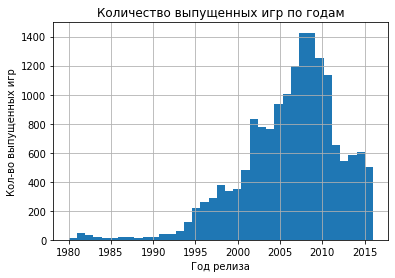

In [8]:
games['year_of_release'].plot(kind='hist', bins=len(games['year_of_release'].unique()), \
                              grid=True, title='Количество выпущенных игр по годам');
plt.xlabel('Год релиза')
plt.ylabel('Кол-во выпущенных игр');

По гистограмме видим что основной пик вышедших игр приходится на 2007 и 2008 год.

#### Ищем топ платформ по продажам, и изучаем их цикл

In [9]:
# Удаляем выброс по платформе DS
games.loc[(games['platform'] == 'DS') & (games['year_of_release'] == 1985)]
games = games.drop(labels=15704).reset_index(drop=True)

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


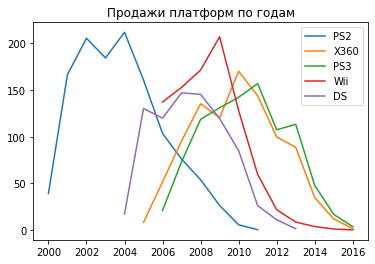

<Figure size 720x576 with 0 Axes>

In [10]:
#games = games.loc[(games['platform'] != 'DS') & (games['year_of_release'] != 1985)]
top_platforms = games.groupby('platform').agg({'sales' : 'sum'}).sort_values(by='sales', ascending=False)
top_5_platforms = top_platforms[0 : 5]
for i in top_5_platforms.index:
    plt.plot(games.loc[games['platform'] == i].pivot_table(index='year_of_release', values='sales', aggfunc='sum'), \
             label=i);
plt.legend();
plt.title('Продажи платформ по годам');
plt.figure(figsize=(10, 8));
top_platforms.head(10)

Выше видим топ 10 платформ по количеству продаж. Так же построили график из 5 лидеров продаж по годам. Из него видно, что в основном цикл каждой платформы окло 10 лет. Пик продаж происходит на 5 год, после идет постепенное падение.

#### Делаем срез и смотрим лидеров продаж

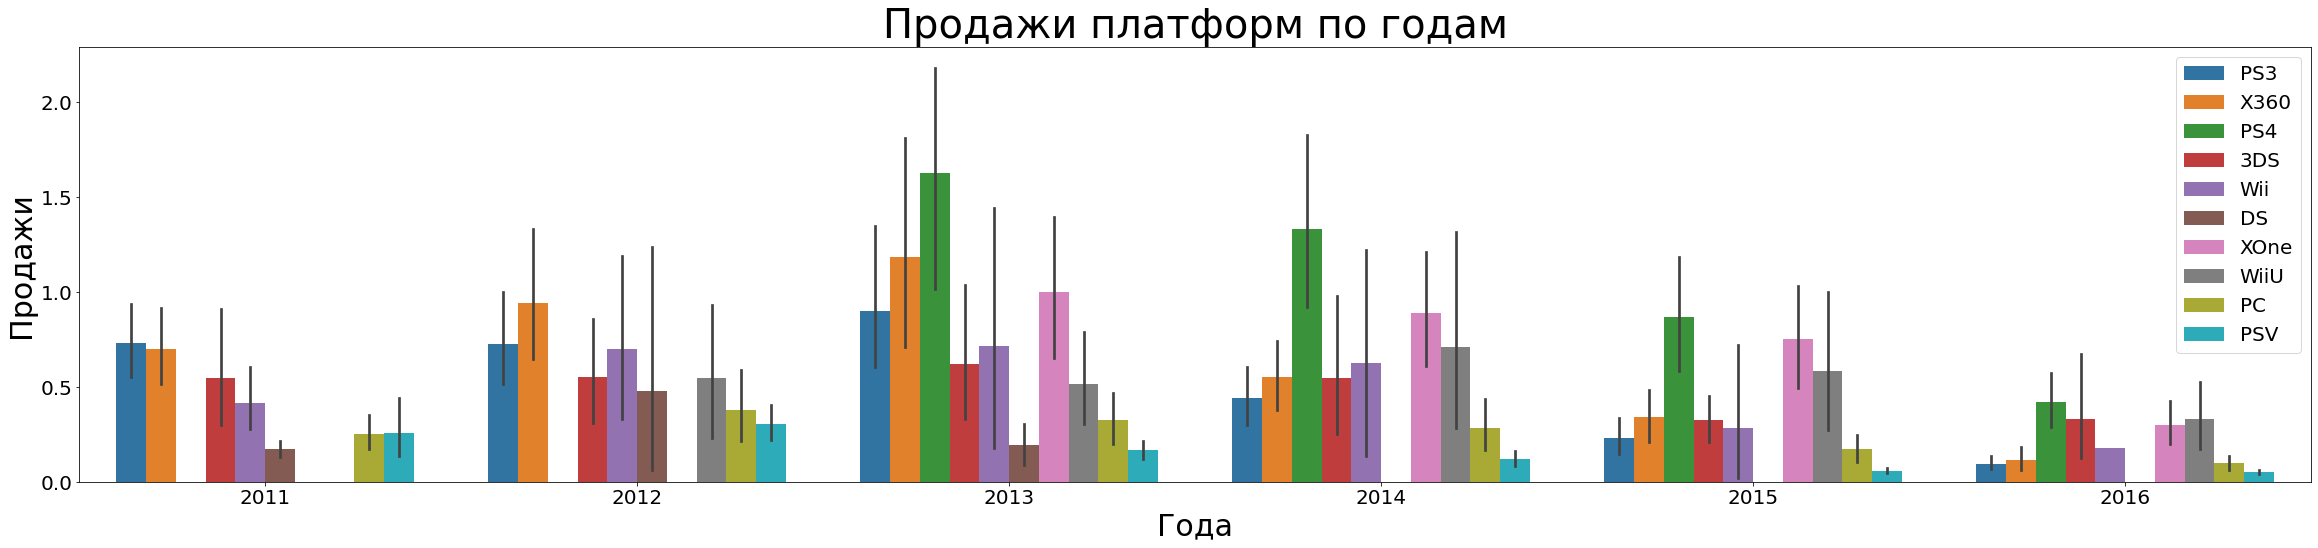

In [11]:
#Делаем срез из 5 лет
games2011 = games.query('year_of_release >= 2011')
#Выводим список лидеров продаж в эти 5 лет
games2011_top_10 = games2011.pivot_table(index='platform', 
                                         values='sales', 
                                         aggfunc='sum')\
.sort_values(by='sales', ascending=False)

games2011_top_10 = games2011_top_10[0:10]
#Делаем датафрейм состоящий из 10 лидеров продаж в предыдущие 5 лет
games2011_data = games2011.loc[games2011['platform'].isin(games2011_top_10.index)]
    
games2011_data
# Составляем график продаж платформ по годам
ax = sns.barplot(x='year_of_release',
                y="sales",
                hue='platform',
                data=games2011_data)
fig = plt.gcf()
fig.set_size_inches(40, 8)
ax.set_title('Продажи платформ по годам', size = 40)
ax.set_xlabel('Года', size = 30)
ax.set_ylabel('Продажи', size = 30)
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
plt.legend(fontsize=20);

На данном этапе, я сделал выборку исходя из продаж топ 10 платформ, за последние 6 лет.  После построил график показывающий сумму продаж каждой платформы за последние 6 лет. Из графика видно, что пик продаж пришелся на 2013 год и к 2016 году продажи падают по всем платформам. Потенциально прибыльные платформы PS4, 3DS, XOne, WiiU, PC. В перечень был включен, так же PC, так как за прошедщие годы уверенно держит свое количество клиентов.

#### Смотрим количество продаж игр по платформам

In [12]:
#Делаем срез из 3 лет
games2014 = games.query('year_of_release >= 2014')
#Выводим список лидеров продаж в эти 3 года
games2014_top_10 = games2014.pivot_table(index='platform', 
                                         values='sales', 
                                         aggfunc='sum')\
.sort_values(by='sales', ascending=False)

games2014_top_10 = games2014_top_10[0:10]
#Делаем датафрейм состоящий из 10 лидеров продаж в предыдущие 3 года
games2014_data = games2014.loc[games2011['platform'].isin(games2014_top_10.index)].reset_index(drop=True)
    
games2014_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,other,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,other,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,other,7.98


Для дальнейщего исследования делаю срез за последние 3 года, чтоб максимально определить тренды на 2017 год. Так как 2016 год еще не закончен и полные выводы по нему делать рано, то по факту получается 2 полных года.

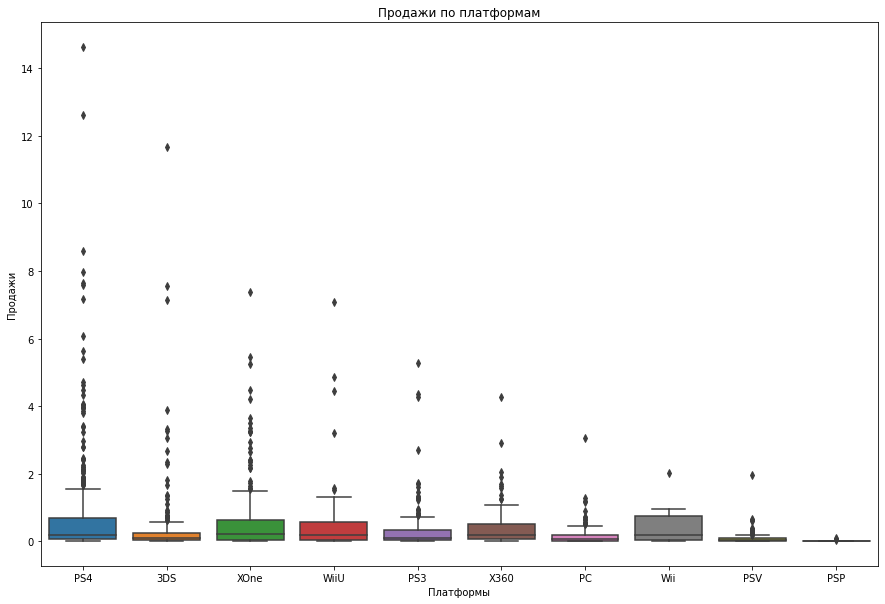

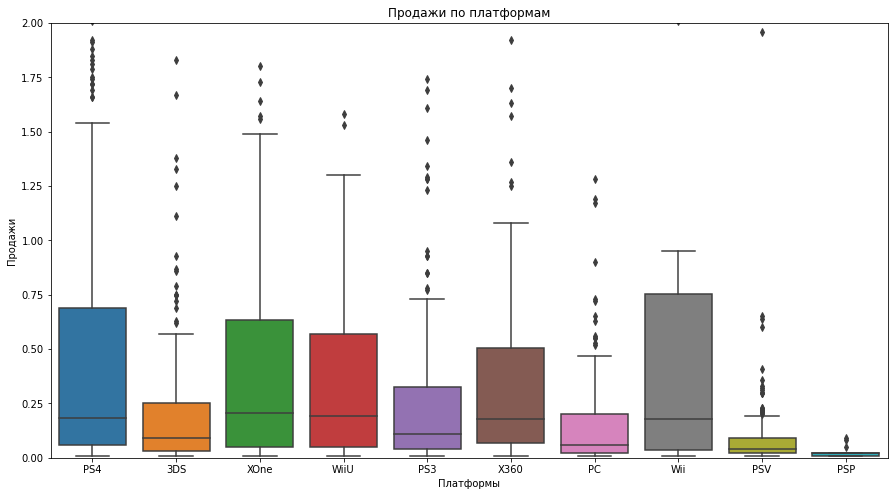

In [13]:
#Строим графики боксплот
ax = sns.boxplot(x='platform',
                y="sales",
                data=games2014_data)
fig = plt.gcf()
fig.set_size_inches(15, 10)
ax.set_title('Продажи по платформам')
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи');
plt.show()
ax = sns.boxplot(x='platform',
                y="sales",
                data=games2014_data)
fig = plt.gcf()
fig.set_size_inches(15, 8)
ax.set_title('Продажи по платформам')
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи');
plt.ylim(0, 2);
plt.show()

Из графика боксплот мы видим, что у топ 5 лидеров за последние 3 года, продажи игр держется в среднем 0.4 млн копий продаж. Но видно, особенно у лидеров, что есть игры, продажи которых аномально высокие. Данные игры можно назвать "Локомативами" платформ. Их продажи значительно отличаются от рядовых игр.

#### Изучаем взаимосвязь отзывов и продажам игр

Корреляция между отзывами критиков и продажами: 0.40190287811475334
Корреляция между отзывами пользователей и продажами: -0.04318585997193634


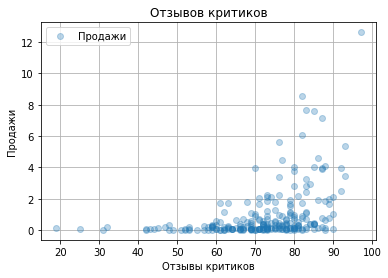

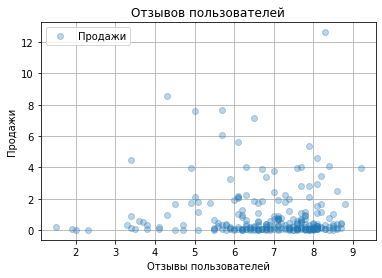

In [14]:
#Строим графики диаграмму рассеяния, и смотрим корреляцию для PS4
games2014_ps4 = games2014_data.query('platform == "PS4" and critic_score >= 1 and user_score >= 1')
games2014_ps4.plot(x='critic_score',
                   y='sales',
                   style='o',
                   grid=True,
                   alpha=0.3,
                   title='Отзывов критиков', xlabel='Отзывы критиков', ylabel='Продажи', label='Продажи');
games2014_ps4.plot(x='user_score',
                   y='sales',
                   style='o',
                   grid=True,
                   alpha=0.3,
                   title='Отзывов пользователей', xlabel='Отзывы пользователей', ylabel='Продажи', label='Продажи');
print('Корреляция между отзывами критиков и продажами:', games2014_ps4['critic_score'].corr(games2014_ps4['sales']))
print('Корреляция между отзывами пользователей и продажами:', games2014_ps4['user_score'].corr(games2014_ps4['sales']))

Корреляция между отзывами критиков и продажами: 0.42211185105557647
Корреляция между отзывами пользователей и продажами: -0.0917343450331075


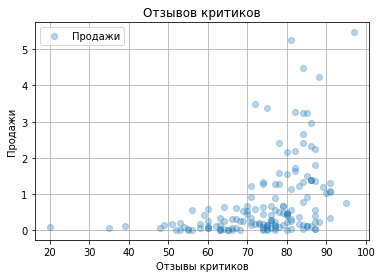

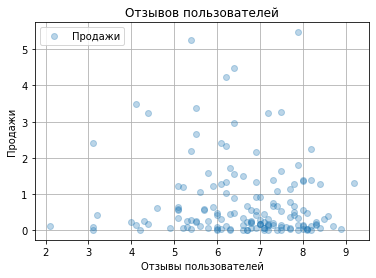

In [15]:
#Строим графики диаграмму рассеяния, и смотрим корреляцию для Xone
games2014_xone = games2014_data.query('platform == "XOne" and critic_score >= 1 and user_score >= 1')
games2014_xone.plot(x='critic_score',
                   y='sales',
                   style='o',
                   grid=True,
                   alpha=0.3,
                   title='Отзывов критиков', xlabel='Отзывы критиков', ylabel='Продажи', label='Продажи');
games2014_xone.plot(x='user_score',
                   y='sales',
                   style='o',
                   grid=True,
                   alpha=0.3,
                   title='Отзывов пользователей', xlabel='Отзывы пользователей', ylabel='Продажи', label='Продажи');
print('Корреляция между отзывами критиков и продажами:', games2014_xone['critic_score'].corr(games2014_xone['sales']))
print('Корреляция между отзывами пользователей и продажами:', games2014_xone['user_score'].corr(games2014_xone['sales']))

Корреляция между отзывами критиков и продажами: 0.3756402218389979
Корреляция между отзывами пользователей и продажами: 0.4114513876908575


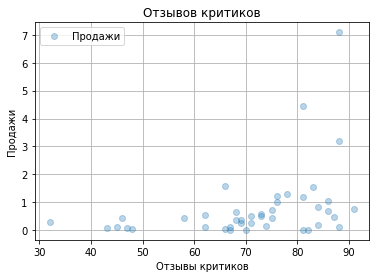

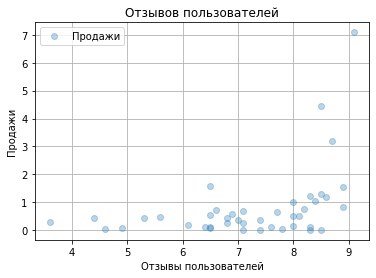

In [16]:
#Строим графики диаграмму рассеяния, и смотрим корреляцию для WiiU
games2014_wiiu = games2014_data.query('platform == "WiiU" and critic_score >= 1 and user_score >= 1')
games2014_wiiu.plot(x='critic_score',
                   y='sales',
                   style='o',
                   grid=True,
                   alpha=0.3,
                   title='Отзывов критиков', xlabel='Отзывы критиков', ylabel='Продажи', label='Продажи');
games2014_wiiu.plot(x='user_score',
                   y='sales',
                   style='o',
                   grid=True,
                   alpha=0.3,
                   title='Отзывов пользователей', xlabel='Отзывы пользователей', ylabel='Продажи', label='Продажи');
print('Корреляция между отзывами критиков и продажами:', games2014_wiiu['critic_score'].corr(games2014_wiiu['sales']))
print('Корреляция между отзывами пользователей и продажами:', games2014_wiiu['user_score'].corr(games2014_wiiu['sales']))

Корреляция между отзывами критиков и продажами: 0.17206091490145103
Корреляция между отзывами пользователей и продажами: -0.08997391228554938


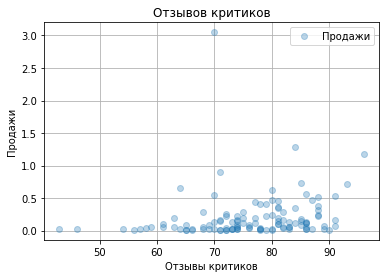

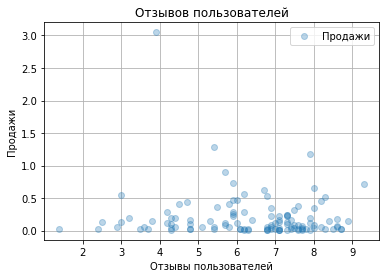

In [17]:
#Строим графики диаграмму рассеяния, и смотрим корреляцию для PC
games2014_pc = games2014_data.query('platform == "PC" and critic_score >= 1 and user_score >= 1')
games2014_pc.plot(x='critic_score',
                   y='sales',
                   style='o',
                   grid=True,
                   alpha=0.3,
                   title='Отзывов критиков', xlabel='Отзывы критиков', ylabel='Продажи', label='Продажи');
games2014_pc.plot(x='user_score',
                   y='sales',
                   style='o',
                   grid=True,
                   alpha=0.3,
                   title='Отзывов пользователей', xlabel='Отзывы пользователей', ylabel='Продажи', label='Продажи');
print('Корреляция между отзывами критиков и продажами:', games2014_pc['critic_score'].corr(games2014_pc['sales']))
print('Корреляция между отзывами пользователей и продажами:', games2014_pc['user_score'].corr(games2014_pc['sales']))

Из графиков мы видим, что количество продаж тесно связанны с отзывами критиков, что мы так же видим на корреляции. Отзывы пользователей не так влияют на продажи, что так же показала корреляция. Однако на платформе WiiU мы видим, что на продажи так же сильно влияют и оценки пользователей. Не стоит сбрасывать со счетов мнение пользователей. Пользователи в данных случаях могут быть более требовательны к играм. Так же в данных мало информации, чтоб можно было смело сказать, что пользователи мало влияют на продажи.  Из данных были убранны значения со значением 0, чтоб не исказить исследование, так как до этого пропуски мы заполняли 0. По графикам так же видно, что аномальные значения по продажам сопровождаются с высоким рейтингом от критиков. На других платформах мы видим, что есть игры с аномально высокими продажами. Можно предположить, что они так же тесно связаны с оценкой критиков.

#### Смотрим кол-во продаж по жанрам

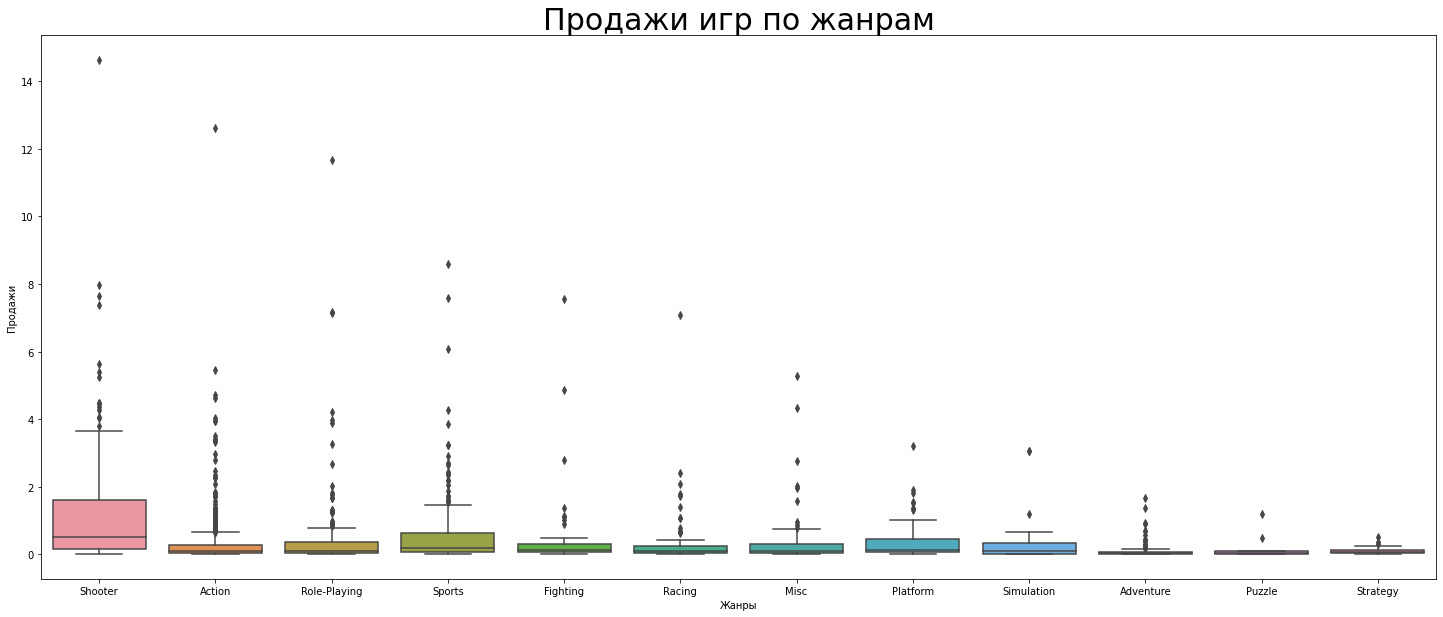

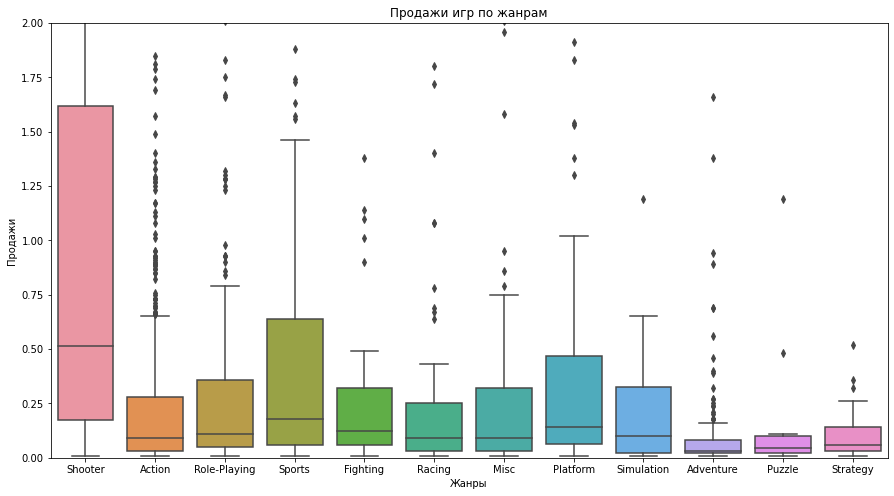

In [18]:
#Строим боксплот по жанрам
ax = sns.boxplot(x='genre',
                y="sales",
                data=games2014_data)
fig = plt.gcf()
fig.set_size_inches(25, 10)
ax.set_title('Продажи игр по жанрам', size=30)
ax.set_xlabel('Жанры')
ax.set_ylabel('Продажи');
plt.show()
ax = sns.boxplot(x='genre',
                y="sales",
                data=games2014_data)
fig = plt.gcf()
fig.set_size_inches(15, 8)
ax.set_title('Продажи игр по жанрам')
ax.set_xlabel('Жанры')
ax.set_ylabel('Продажи');
plt.ylim(0, 2);
plt.show()

Наиболее популярный жанр игр является шутер. Он значительно опережает по продажам остальные жанры. Следующие игры, которые вырываются в пятерку лидеров - это Sport, Platform Role-Playing и Misc с Simulation. Наименее покупаемые игры это Puzzle с Adventure. Так же стоит обратить внимание на жанр Action так как в нем много игр, которые выходят за стандартные рамки продаж, и набирают выше среднего количество продаж

### Составление портрета пользователя по каждому региону

#### Смотрим какие платформы лидируют по регионам

In [19]:
#Делаем срез из 3 лет по топ 5 лидеров продаж по платформам
games2014 = games.query('year_of_release >= 2014').reset_index(drop=True)
#Выводим список лидеров продаж в эти 3 года
platform_top_5 = games2014.pivot_table(index='platform', 
                                         values='sales', 
                                         aggfunc='sum')\
.sort_values(by='sales', ascending=False)

#Делаем датафрейм состоящий из 5 лидеров продаж
platform_top_5 = platform_top_5[0:5]
platform_data_top_5 = games2014
platform_data_top_5['platform'] = platform_data_top_5['platform'].where(platform_data_top_5['platform'].isin(platform_top_5.index), 'other')
#platform_data_top_5 = games2014.loc[games2011['platform'].isin(platform_top_5.index)].reset_index(drop=True)

In [20]:
#Делаем срез из 3 лет по топ 5 лидеров продаж по жанрам
games2014 = games.query('year_of_release >= 2014').reset_index(drop=True)
#Выводим список лидеров продаж в эти 3 года
genre_top_5 = games2014.pivot_table(index='genre', 
                                         values='sales', 
                                         aggfunc='sum')\
.sort_values(by='sales', ascending=False)

#Делаем датафрейм состоящий из 5 лидеров продаж
genre_top_5 = genre_top_5[0:5]
genre_data_top_5 = games2014
genre_data_top_5['genre'] = genre_data_top_5['genre'].where(genre_data_top_5['genre'].isin(genre_top_5.index), 'other')
#genre_data_top_5 = games2014.loc[games2011['genre'].isin(genre_top_5.index)].reset_index(drop=True)
genre_top_5

,sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55


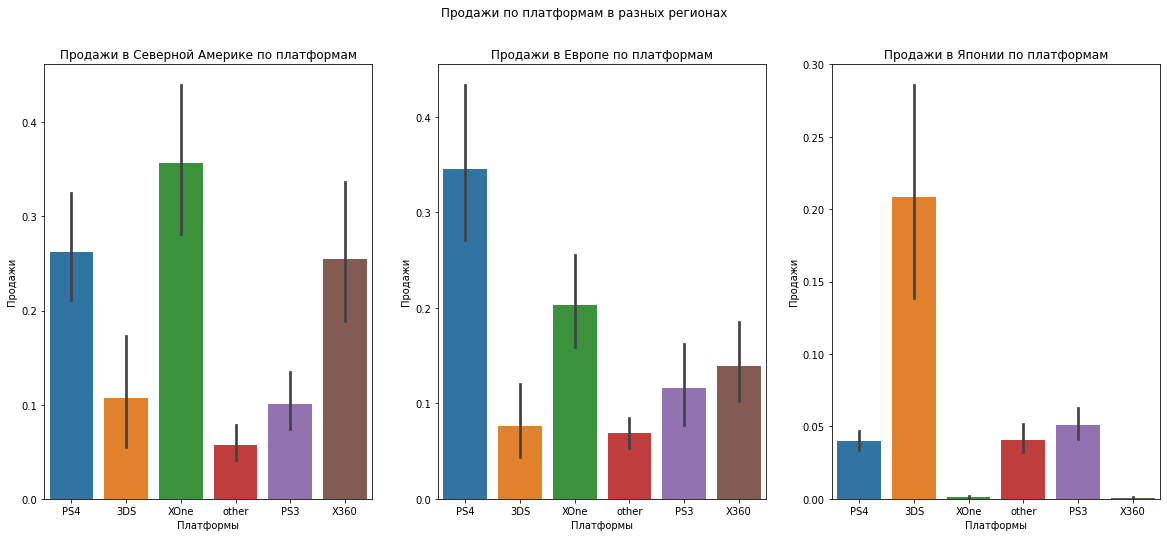

In [21]:
#Составляем графики продаж по регионам в зависимости от платформы
plt.subplot(1, 3, 1)
ax = sns.barplot(x='platform',
                y="na_sales",
                data=platform_data_top_5)
ax.set_title('Продажи в Северной Америке по платформам')
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')
plt.subplot(1, 3, 2)
ax = sns.barplot(x='platform',
                y="eu_sales",
                data=platform_data_top_5)
ax.set_title('Продажи в Европе по платформам')
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='platform',
                y="jp_sales",
                data=platform_data_top_5)
ax.set_title('Продажи в Японии по платформам')
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')
fig = plt.gcf()
fig.set_size_inches(20, 8)
fig.suptitle('Продажи по платформам в разных регионах')
plt.show()

Предпочтение приставок в разных регионах отличается. Последние 3 года в Северное Америке предпочтение отдают ХOne, в Европе - PS4, в Японии - 3DS.

#### Смотрим какие жанры лидируют по регионам

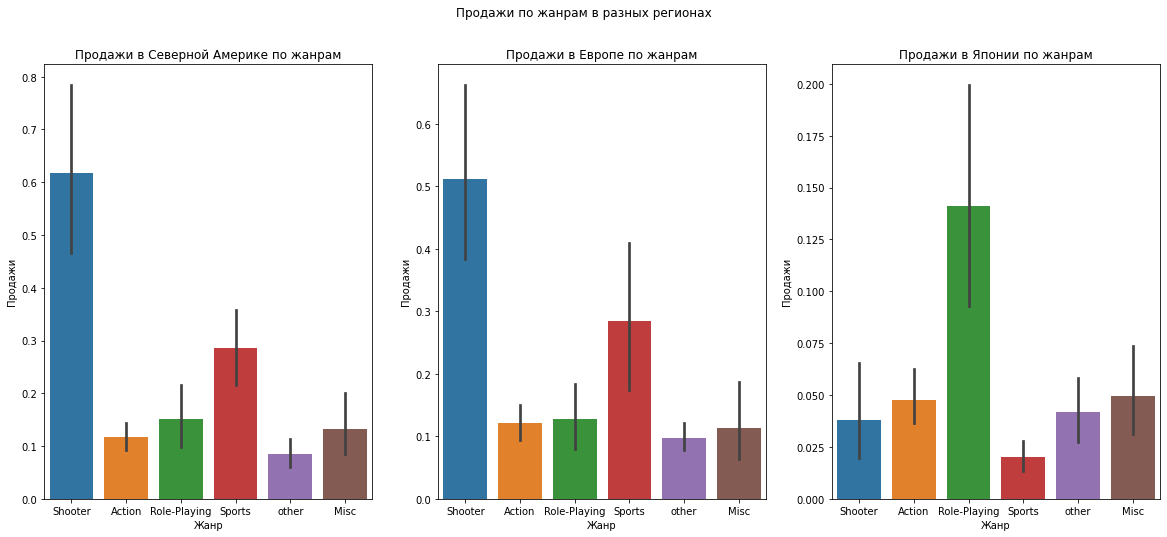

In [22]:
#Составляем графики продаж по регионам в зависимости от жанра
plt.subplot(1, 3, 1)
ax = sns.barplot(x='genre',
                y="na_sales",
                data=genre_data_top_5)
ax.set_title('Продажи в Северной Америке по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи')
plt.subplot(1, 3, 2)
ax = sns.barplot(x='genre',
                y="eu_sales",
                data=genre_data_top_5)
ax.set_title('Продажи в Европе по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи')
plt.subplot(1, 3, 3)
ax = sns.barplot(x='genre',
                y="jp_sales",
                data=genre_data_top_5)
ax.set_title('Продажи в Японии по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи')
fig = plt.gcf()
fig.set_size_inches(20, 8)
fig.suptitle('Продажи по жанрам в разных регионах')
plt.show()

Наиболее популярный жанр в Северной Америке и Европе за последние 3 года - шутер. Вкусы Японцев немного отличаются, наиболее продаваемый жанр это Role-Playing

#### Изучаем как влияет рейтинг игр по регионам

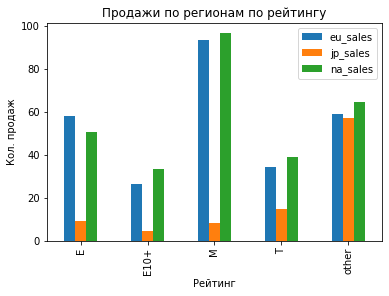

In [23]:
#Строим график по количеству продаж в регионах, в зависимости от рейтинга
games2014.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.plot(kind='bar',
      title='Продажи по регионам по рейтингу',
     xlabel='Рейтинг',
     ylabel='Кол. продаж');

В Северной Америке и Европе зависимость продаж в последние 3 года, так же зависит от рейтинга. Самые продаваемые игры - игры с пометкой "Для взрослых", третье по популярности "Игры для всех". В отличии от предыдущих двух регионов, в Японии продажи игр менее зависимы от рейтинга. Так же необходимо проверить пропуски в колонке рейтинг. Так как в регионах рейтинги или рейтинг, которые не были определенны,  имеют существенный вклад в продажи. Особенно большое влияние на регион Японии. Неопределенные рейтинг в Японии в 6 раз выше, рейтингов, которые были определенны. 

### Проверка гипотез

#### Проверяем гипотизу 1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
```
H_0: Средний пользовательский рейтинг (user_score) пользователей "Xbox" = Средний пользовательский рейтинг (user_score) пользователей "PC"
H_a: Средний пользовательский рейтинг (user_score) пользователей "Xbox" ≠ Средний пользовательский рейтинг (user_score) пользователей "PC"
alpha = 0.05
```

In [24]:
games_user_score = games.query('user_score >= 1 and year_of_release >= 2014')
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(games_user_score[games_user_score['platform']=='XOne']['user_score'], \
                       games_user_score[games_user_score['platform']=='PC']['user_score'])
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print(f'Вероятность получить такое же значение: {results.pvalue:.1%}')
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Вероятность получить такое же значение: 10.5%
Не получилось отвергнуть нулевую гипотезу


#### Проверяем гипотизу 2

Средние пользовательские рейтинги жанров Action и Sports разные.
```
H_0: Средний пользовательский рейтинг (user_score) жанров "Action" = Средний пользовательский рейтинг (user_score) пользователей "Sports"
H_a: ССредний пользовательский рейтинг (user_score) жанров "Action" ≠ Средний пользовательский рейтинг (user_score) пользователей "Sports"
alpha = 0.05
```

In [25]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(games_user_score[games_user_score['genre']=='Action']['user_score'], \
                       games_user_score[games_user_score['genre']=='Sports']['user_score'])
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print(f'Вероятность получить такое же значение: {results.pvalue:.1%}')
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Вероятность получить такое же значение: 0.0%
Отвергаем нулевую гипотезу


В данном разделе было проведено два исследования. Перед исследованиями из колонки рейтинг пользователей было удалено значение 0, которым мы меняли значения tbd и пропуски, чтоб не исказить результаты. В обоих случаях мы сравнивали равны ли средние оценки пользователей. Гипотезы были проверены методом равенства средних двух генеральных совокупностей.
Исследование показало, что средняя оценка пользователя платформы xbox отличается от оценки пользователей PC.
В то же время, средняя оценка игроков игр в жанрах экшен и спорт примерно равны.

In [26]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Общий вывод

В данном проекты мы разбирали, какие факторы влияют на успещность игр.

**Выдвинутые задачи**
1. Выявить закономерности определяющие критерии успещности игры.
2. На основе этих закономерностей дать рекоммендацию на что сделать ставку при выборе потенциально популярного продукта.
3. Дать рекоммендацию при планировании рекламных компаний на следующий период.

**В ходе исследования**

Были изучены данные в данных были найдены пропуски. Пропуски в колонках игры, жанр, год релиза было решено удалить, так как общее количество значений в данных столбцах было незначительное менее 2%. В столбцах оценки пользователей, критиков и рейтинг, было много пропусков. Количество пропусков составляло более 40%. Чтоб не исказить результаты, пропуски были поменяны на 0 (в дальнейшем, где было необходимо, они удалялись). Так же в колонке оценки пользователь встречалось значение tbd (будет определено), они так же были заменены на значение 0. В столбце рейтинг пропуски были заменены на значение "other".

**Были проведены исследования**
1. Определено, что основной пик выхода игр был 2007 и 2008 год. За все время наиболее продаваемые были игры на платформах PS, X360, PS3, Wii, DS. Средний цикл существования платформ 10 лет. Наиболее успешное время существования платформы пятый год. На него приходится, как правило пик продаж у топовых платформ.
2. Было решено, для наиболее близкого прогноза результатов на 2017год, взять данные за последние 3 года.
3. Разобрали продажи по 10 топовым платформам за последние 6 лет. Увидили, что с 2013 года продажи по всем платформам падали. Наиболее перспективные платформы стали PS4, 3DS, XOne, WiiU, PC, с наибольшим количеством продаж. В перечень был включен, так же PC, так как за прошедщие годы уверенно держит свое количество клиентов.
4. Так же был построен график по количеству продаж игр, каждой платформы. Из него видно, что средние игры у лидеров продаются в среднем по 0,4млн копий. Но так же много игр, которые выбиваются из средних показателей. Продажи по некоторым играм, которые можно назвать "Локомативами" достигают метки 20млн копий. Данные игры присутствуют на всех платформах.
5. При проведении анализа взаимосвязи, было выявлено, оценки критиков взаимосвязаны с продажами игр. В то же время оценки пользователей почти не связаны с количеством проданных копий. Но не стоит сбрасывать со счетов мнение пользователей. Пользователи в данных случаях могут быть более требовательны к играм. Так же в данных мало информации, чтоб можно было смело сказать, что пользователи мало влияют на продажи. Предпложожение можно наблюдать на платформе WiiU, где количество продаж взаимосвязано с оценкой пользователей
6. За последние 6 лет наиболее популярным жанром явился Shooter. Чуть менее популярны игры жанра Platorm, Sports, Role-Playing и и Misc с Simulation. Менее всего популярными стали жанры Adventure и Puzzle
7. За последние 3 года приставки на платформе XOne стали наиболее популярны в Северной Америке, Европейцы отдали предпочтение PS4, а Японцы 3DS. По жанрам, Европейцы с Американцами свой взгляд остановили на жанр Shooter. Японцы их взгляд не разделили и отдали предпочтение Role-Playing
8. Рейтинг для регионов Северной Америки и Европы, оказался немаловажным, наибольшее предпочтение они оставили играм для взрослых, второе по популярности стали игры для всех. В Японии продажи от рейтинга менее зависимы. Разница продаж не слишком велика, наиболее популярные у них игры для всех. Однако в Японии очень велики продажи от неопознаных рейтингов, которые почти в 6 раз превосходят остальные. Так же игры с неопределенным рейтингом заняли 2 место по продажам в  Северной Америке и Европе.

**Были проверены гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Данная гипотеза показала, что средняя оценка пользователя платформы xbox отличается от оценки пользователей PC
- Средние пользовательские рейтинги жанров Action и Sports разные. Данная гипотеза показала, что средняя оценка игроков игр в жанрах экшен и спорт примерно равны

**Общие рекомендации**
- Наиболее популярные платформы в 2017 остануться PS4, 3DS, XOne, WiiU. Если делать среднестатестическую игру на топовых платформах, необходимо расчитывать в среднем на 0.4млн проданных копий. В тоже время при создании игры "Бестселлера" с высокой оценкой критиков, можно рассчитывать на более высокие продажи от 10млн проданных копий. В зависимости от региона продаж основной упор можно сделать в Северной Америке на игры жанра шутер на платформе xbox, для Европейцев на жанре шутер на платформе PS, для Японцев на ролевые игры на платформе нинтендо. Если охватывать продажи по всему миру, то упор можно сделать на шутере, на платформе PS4. Основываясь на рейтингах, лучше ориентироваться на игры для взрослых или на игры для всех категорий. 
- Так как в столбцах оценки пользователь и критиков, а так же в столбце рейтин, было более 40% пропусков, рекомендую дополнить выборку и провести повторное исследование
- Много продаж ушло на рейтинги, которые не получилось определить, если собрать данные, и провести дополнительное исследование можно понять какие рейтинги наиболее влияют на игроманов Японии.